In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Neural Networks

In [2]:
def relu(x):
  return np.maximum(x, 0)

In [3]:
W = np.array([[ 1, 0],
              [ 0, 1],
              [-1, 0],
              [ 0,-1]])

Wb = np.array([-1, -1, -1, -1])

V = np.array([[ 1, 1, 1, 1],
              [-1,-1,-1,-1]])

Vb= np.array([0, 2])

In [4]:
x = np.array([3, 14])

z = relu(W @ x + Wb)
o = relu(V @ z + Vb)
o = np.exp(o) / np.exp(o).sum()

np.set_printoptions(precision=9, suppress=True)
print(o)

[0.999999694 0.000000306]


# 2. LSTM

In [5]:
Wfh = 0
Wfx = 0
bf  = -100
Wch = -100
Wih = 0
Wix = 100
bi  = 100
Wcx = 50
Woh = 0
Wox = 100
bo  = 0
bc  = 0

In [6]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [7]:
ft = lambda x, h: sigmoid(Wfh*h + Wfx*x + bf)
it = lambda x, h: sigmoid(Wih*h + Wix*x + bi)
ot = lambda x, h: sigmoid(Woh*h + Wox*x + bo)

## LSTM states

In [8]:
## step 0
h = 0
c = 0

x0 = 0
f0 = ft(x0, h)
i0 = it(x0, h)
o0 = ot(x0, h)

c0 = f0 * c + i0*np.tanh(Wch*h + Wcx*x0 + bc)
h0 = o0 * np.tanh(c0)
h0

0.0

In [9]:
## step 1
x1 = 0
f1 = ft(x1, h0)
i1 = it(x1, h0)
o1 = ot(x1, h0)

c1 = f1 * c0 + i1*np.tanh(Wch*h0 + Wcx*x1 + bc)
h1 = o1 * np.tanh(c1)
h1

0.0

In [10]:
## step 2
x2 = 1
f2 = ft(x2, h1)
i2 = it(x2, h1)
o2 = ot(x2, h1)

c2 = f2 * c1 + i2*np.tanh(Wch*h1 + Wcx*x2 + bc)
h2 = o2 * np.tanh(c2)
h2

0.7615941559557649

In [11]:
## step 3
h2 = 1

x3 = 1
f3 = ft(x3, h2)
i3 = it(x3, h2)
o3 = ot(x3, h2)

c3 = f3 * c2 + i3*np.tanh(Wch*h2 + Wcx*x3 + bc)
h3 = o3 * np.tanh(c3)
h3

-0.7615941559557649

In [12]:
## step 4
h3 = -1

x4 = 1
f4 = ft(x4, h3)
i4 = it(x4, h3)
o4 = ot(x4, h3)

c4 = f4 * c3 + i4*np.tanh(Wch*h3 + Wcx*x4 + bc)
h4 = o4 * np.tanh(c4)
h4

0.7615941559557649

In [13]:
## step 5
h4 = 1

x5 = 0
f5 = ft(x5, h4)
i5 = it(x5, h4)
o5 = ot(x5, h4)

c5 = f5 * c4 + i5*np.tanh(Wch*h4 + Wcx*x5 + bc)
h5 = o5 * np.tanh(c5)
h5

-0.3807970779778824

## LSTM state2

In [14]:
## step 0
h = 0
c = 0

x0 = 1
f0 = ft(x0, h)
i0 = it(x0, h)
o0 = ot(x0, h)

c0 = f0 * c + i0*np.tanh(Wch*h + Wcx*x0 + bc)
h0 = o0 * np.tanh(c0)
h0

0.7615941559557649

In [15]:
## step 1
h0 = 2

x1 = 1
f1 = ft(x1, h0)
i1 = it(x1, h0)
o1 = ot(x1, h0)

c1 = f1 * c0 + i1*np.tanh(Wch*h0 + Wcx*x1 + bc)
h1 = o1 * np.tanh(c1)
h1

-0.7615941559557649

In [16]:
## step 2
h1 = -1

x2 = 0
f2 = ft(x2, h1)
i2 = it(x2, h1)
o2 = ot(x2, h1)

c2 = f2 * c1 + i2*np.tanh(Wch*h1 + Wcx*x2 + bc)
h2 = o2 * np.tanh(c2)
h2

0.3807970779778824

In [17]:
## step 3
h2 = 0

x3 = 1
f3 = ft(x3, h2)
i3 = it(x3, h2)
o3 = ot(x3, h2)

c3 = f3 * c2 + i3*np.tanh(Wch*h2 + Wcx*x3 + bc)
h3 = o3 * np.tanh(c3)
h3

0.7615941559557649

In [18]:
## step 4
h3 = 1

x4 = 1
f4 = ft(x4, h3)
i4 = it(x4, h3)
o4 = ot(x4, h3)

c4 = f4 * c3 + i4*np.tanh(Wch*h3 + Wcx*x4 + bc)
h4 = o4 * np.tanh(c4)
h4

-0.7615941559557649

# 3. Backpropagation

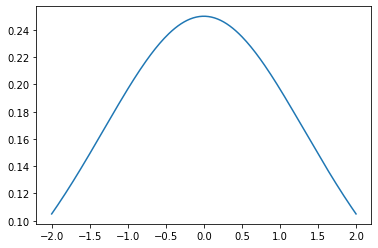

In [19]:
z = np.linspace(-2, 2, 201)
plt.plot(z, sigmoid(z)*(1-sigmoid(z)))

In [20]:
t = 1
x = 3
w1=0.01
w2=-5
b =-1

z1 = w1 * x
a1 = relu(z1)
z2 = w2 * a1 + b
y  = sigmoid(z2)
C  = 0.5 * (y-t)**2

In [21]:
dy = y - t
dz2= dy * y * (1-y)
dw2= dz2 * a1
db = dz2
da1= dz2 * w2
dw1= da1 * (z1>0) * x

print(f"C  ={C}")
print(f"dw1={dw1}")
print(f"dw2={dw2}")
print(f"db ={db}")

C  =0.28842841648243966
dw1=2.0809165621704553
dw2=-0.00416183312434091
db =-0.13872777081136367
